<a href="https://colab.research.google.com/github/NallelyHernandezG/Simulacion-I/blob/main/M%C3%A9todo_Composici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

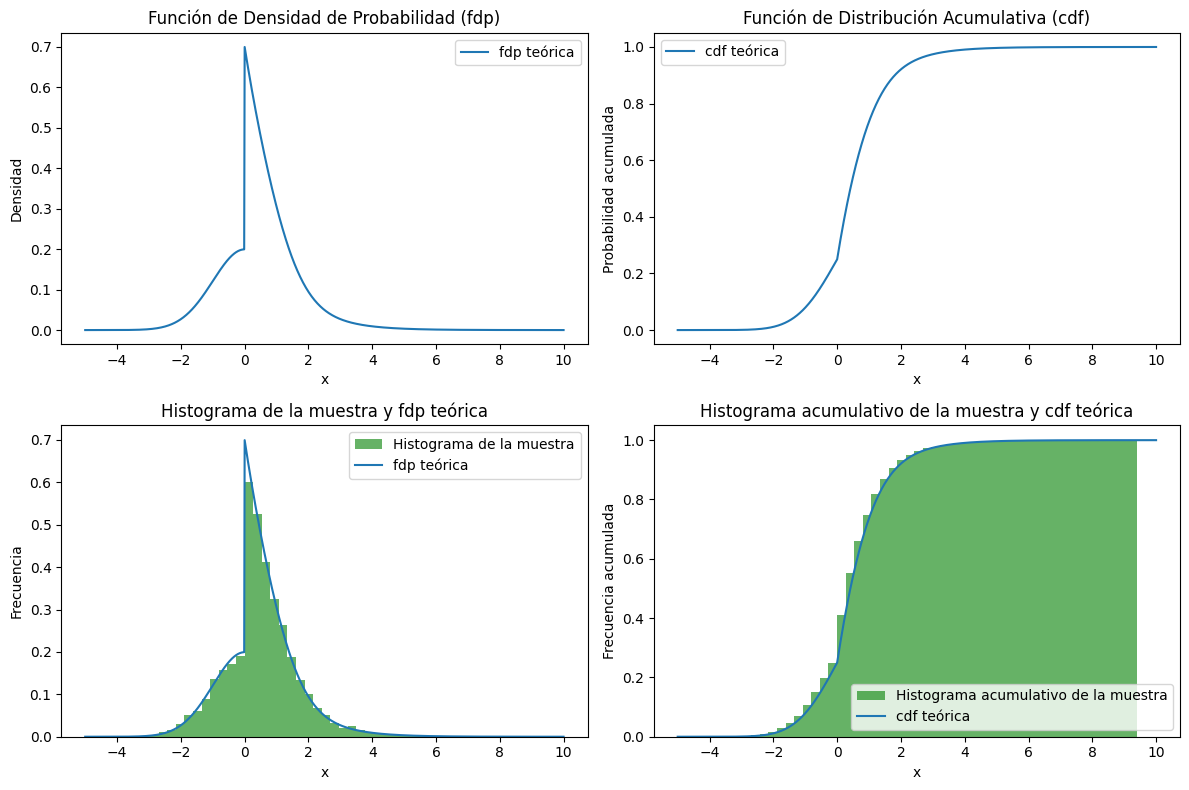

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Parámetros de las distribuciones
lambda_exp = 1.0  # Parámetro de la distribución exponencial
mu_norm = 0.0     # Media de la distribución normal
sigma_norm = 1.0  # Desviación estándar de la distribución normal
p = 0.5           # Probabilidad para la combinación

# Generar una muestra de la distribución compuesta
def generate_composite_sample(size):
    sample = []
    for _ in range(size):
        if np.random.rand() < p:
            sample.append(np.random.exponential(1 / lambda_exp))
        else:
            sample.append(np.random.normal(mu_norm, sigma_norm))
    return np.array(sample)

# Tamaño de la muestra
sample_size = 10000
sample = generate_composite_sample(sample_size)

# Funciones teóricas
x = np.linspace(-5, 10, 1000)
pdf_theoretical = p * expon.pdf(x, scale=1/lambda_exp) + (1 - p) * norm.pdf(x, mu_norm, sigma_norm)
cdf_theoretical = p * expon.cdf(x, scale=1/lambda_exp) + (1 - p) * norm.cdf(x, mu_norm, sigma_norm)

# Graficar la función de densidad de probabilidad (fdp)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, pdf_theoretical, label='fdp teórica')
plt.title('Función de Densidad de Probabilidad (fdp)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

# Graficar la función de distribución acumulativa (cdf)
plt.subplot(2, 2, 2)
plt.plot(x, cdf_theoretical, label='cdf teórica')
plt.title('Función de Distribución Acumulativa (cdf)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()

# Graficar el histograma de la muestra
plt.subplot(2, 2, 3)
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Histograma de la muestra')
plt.plot(x, pdf_theoretical, label='fdp teórica')
plt.title('Histograma de la muestra y fdp teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()

# Graficar el histograma acumulativo de la muestra
plt.subplot(2, 2, 4)
plt.hist(sample, bins=50, density=True, cumulative=True, alpha=0.6, color='g', label='Histograma acumulativo de la muestra')
plt.plot(x, cdf_theoretical, label='cdf teórica')
plt.title('Histograma acumulativo de la muestra y cdf teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia acumulada')
plt.legend()

plt.tight_layout()
plt.show()
